#                                    PIMA INDIAN DIABETS

#### Introduction. Project is to find accuracy of Pima Indian Diabets sample dataset. The data set contains columns like Pregnancy, Glucose, Blood Pressure, Skin Thickness, Insulin, BM, Diabetes Pedigree Function, Age, Class.

#### Algorithm Used: Logistic Regression, Naive Bayes and Decision Tree

# 1. Logistic Regressionor for Pima Indian Diabets sample dataset

#### Logistic regression is one of the most popular Machine Learning algorithms, which comes under the Supervised Learning technique. It is used for predicting the categorical dependent variable using a given set of independent variables. Logistic regression predicts the output of a categorical dependent variable.

#### The curve from the logistic function indicates the likelihood of something such as whether the cells are cancerous or not, a mouse is obese or not based on its weight, etc. Logistic Regression is a significant machine learning algorithm because it has the ability to provide probabilities and classify new data using continuous and discrete datasets.

## Load Files

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from csv import reader
def load_csv(filename):
    dataset=list()
    open_file=open(filename)
    read_file=reader(open_file)
    for row in read_file:
        if not row:
            continue
        dataset.append(row)
    return dataset

## Converting String column values to float values

In [2]:
def convert_str_to_float(dataset,column):
    for row in dataset:
        row[column]=float(row[column])

## Using Statistics finding min and max values for each attribute

In [3]:
def minmax(dataset):
    minmax=list()
    for i in range(len(dataset[0])):
        column_value=[row[i] for row in dataset]
        min_value=min(column_value)
        max_value=max(column_value)
        minmax.append([min_value,max_value])
    return minmax

## Using Statistics Normalizing the dataset

In [4]:
def normalize_scale(dataset,minmax):
    for row in dataset:
        for i in range(len(row)):
            row[i]=(row[i]-minmax[i][0])/(minmax[i][1]-minmax[i][0])

## Using Statistics building Model Accuracy using KFold Cross validation technique

In [5]:
from random import seed
from random import randrange
def KFold(dataset,folds):
    fold_values=list()
    dataset_copy=list(dataset)
    fold_size=int(len(dataset)/folds)
    for _ in range(folds):
        fold=list()
        while len(fold)<fold_size:
            index=randrange(len(dataset_copy))
            fold.append(dataset_copy.pop(index))
        fold_values.append(fold)
    return fold_values

## Using Statistics Building Model Accuracy metrics prediction using classification accuracy technique

In [6]:
def accuracy_metrics(actual,predicted):
    correct=0
    for i in range(len(actual)):
        if actual[i]==predicted[i]:
            correct+=1
    return correct/float(len(actual))*100.0

## Predicte model values

In [7]:
from math import exp
def predict(row,coeff):
    yhat=coeff[0]
    for i in range(len(row)-1):
        yhat+=coeff[i+1]*row[i]
    return 1.0/(1.0+exp(-yhat))

## Coefficient_Sgd

In [8]:
def coefficient_sgd(train,learning_rate,epoch):
    coeff=[0.0 for row in range(len(dataset[0]))]
    for _ in range(epoch):
        for row in train:
            yhat=predict(row,coeff)
            error=row[-1]-yhat
            coeff[0]=coeff[0]+learning_rate*error*yhat*(1.0-yhat)
            for i in range(len(row)-1):
                coeff[i+1]=coeff[i+1]+learning_rate*error*yhat*(1.0-yhat)*row[i]
    return coeff

## Evaluate Model accuracy

In [9]:
def evaluate_model(dataset,algorithm,folds,*args):
    folds=KFold(dataset,folds)
    accuracy=list()
    for fold in folds:
        train_set=list(folds)
        train_set.remove(fold)
        train_set=sum(train_set,[])
        test_set=list()
        for row in fold:
            row_copy=list(row)
            test_set.append(row_copy)
            row_copy[-1]=None
        predict=algorithm(train_set,test_set,*args)
        actual=[row[-1] for row in fold]
        classification_accuracy=accuracy_metrics(actual,predict)
        accuracy.append(classification_accuracy)
    return accuracy

## Logistic regression Algorithm

In [10]:
def logisitic_regression_classifier(train,test,learning_rate,epoch):
    predicted=list()
    coeff=coefficient_sgd(train,learning_rate,epoch)
    for row in test:
        yhat=predict(row,coeff)
        yhat=round(yhat)
        predicted.append(yhat)
    return predicted

# Logistic regression classifier for Pima Indian Diabets sample dataset

In [11]:
seed(1)
filename='pima-indians-diabetes.csv'
dataset=load_csv(filename)
for column in range(len(dataset[0])):
    convert_str_to_float(dataset,column)
data_minmax=minmax(dataset)
normalize_scale(dataset,data_minmax)
l_rate=0.5
epoch=1000
folds=5
accuracy=evaluate_model(dataset,logisitic_regression_classifier,folds,l_rate,epoch)

## Accuracy

In [12]:
print(accuracy)

[75.81699346405229, 78.43137254901961, 82.35294117647058, 74.50980392156863, 75.16339869281046]


## Mean_Accuracy

In [13]:
print("mean_accuracy:",(sum(accuracy)/float(len(accuracy))))

mean_accuracy: 77.25490196078432


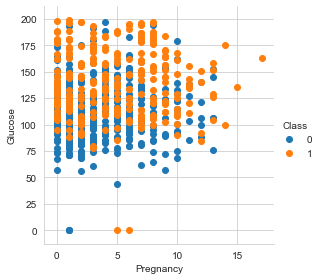

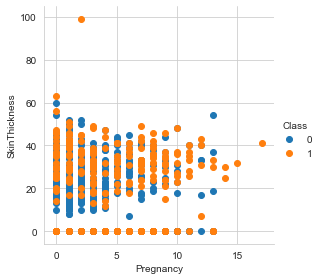

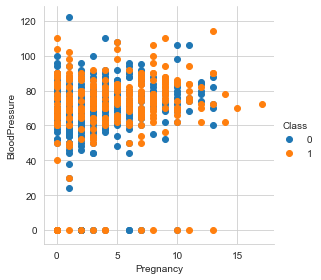

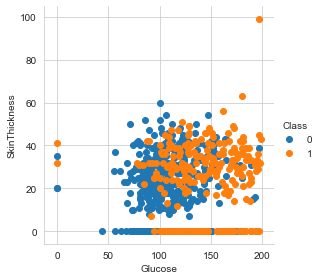

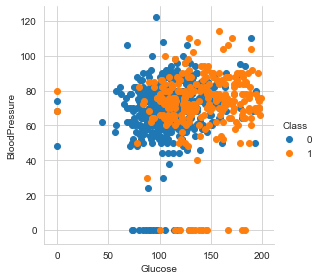

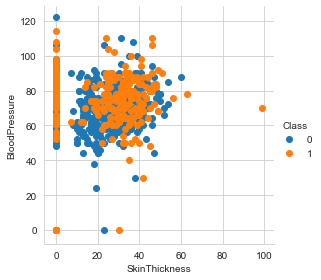

In [14]:
#Visualising Data set
cols = ['Pregnancy','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Class']
df = pd.read_csv('pima-indians-diabetes.csv',header=None,names=cols)

sns.set_style('whitegrid');
sns.FacetGrid(df, hue='Class', height = 4) \
   .map(plt.scatter, 'Pregnancy','Glucose') \
   .add_legend()
sns.set_style('whitegrid');
sns.FacetGrid(df, hue='Class', height = 4) \
   .map(plt.scatter, 'Pregnancy','SkinThickness') \
   .add_legend()
sns.set_style('whitegrid');
sns.FacetGrid(df, hue='Class', height = 4) \
   .map(plt.scatter, 'Pregnancy','BloodPressure') \
   .add_legend()
sns.set_style('whitegrid');
sns.FacetGrid(df, hue='Class', height = 4) \
   .map(plt.scatter, 'Glucose','SkinThickness') \
   .add_legend()
sns.set_style('whitegrid');
sns.FacetGrid(df, hue='Class', height = 4) \
   .map(plt.scatter, 'Glucose','BloodPressure') \
   .add_legend()
sns.set_style('whitegrid');
sns.FacetGrid(df, hue='Class', height = 4) \
   .map(plt.scatter, 'SkinThickness','BloodPressure') \
   .add_legend()

# 2.Naive Bayes For Pima Indians Diabetes

#### Naive Bayes is a Supervised Machine Learning algorithm based on the Bayes Theorem that is used to solve classification problems by following a probabilistic approach. It is based on the idea that the predictor variables in a Machine Learning model are independent of each other.

In [15]:
import csv
import random
import math

## load data from file

In [16]:
def loadCsv(filename):
    lines = csv.reader(open(filename, "r"))
    dataset = list(lines)
    for i in range(len(dataset)):
        dataset[i] = [float(x) for x in dataset[i]]
    return dataset

## Split data into train and test

In [17]:
def splitDataset(dataset, splitRatio):
    trainSize = int(len(dataset) * splitRatio)
    trainSet = []
    copy = list(dataset)
    while len(trainSet) < trainSize:
        index = random.randrange(len(copy))
        trainSet.append(copy.pop(index))
    return [trainSet, copy]

## Group instances by class

In [18]:
def separateByClass(dataset):
    separated = {}
    for i in range(len(dataset)):
        vector = dataset[i]
        if (vector[-1] not in separated):
            separated[vector[-1]] = []
        separated[vector[-1]].append(vector)
    return separated

## Compute mean of a vector

In [19]:
def mean(numbers):
    return sum(numbers)/float(len(numbers))

## Computed std dev of a vector

In [20]:
def stdev(numbers):
    avg = mean(numbers)
    variance = sum([pow(x-avg,2) for x in numbers])/float(len(numbers)-1)
    return math.sqrt(variance)

## Compute summaries where summary is mean and std dev of each column in a dataset

In [21]:
def summarize(dataset):
    summaries = [(mean(attribute), stdev(attribute)) for attribute in zip(*dataset)]

    del summaries[-1]
    return summaries

## Compute summaries for each group where a group is part of a dataset corresponding to a class.

In [22]:
def summarizeByClass(dataset):
    separated = separateByClass(dataset)
    summaries = {}
    for classValue, instances in separated.items():
        summaries[classValue] = summarize(instances)
    return summaries

## Compute prob using a Gaussian distribution

In [23]:
def calculateProbability(x, mean, stdev):
    exponent = math.exp(-(math.pow(x-mean,2)/(2*math.pow(stdev,2))))
    return (1 / (math.sqrt(2*math.pi) * stdev)) * exponent


## Compute P(x|C)

In [24]:
def calculateClassProbabilities(summaries, inputVector):
    probabilities = {}
    for classValue, classSummaries in summaries.items():
        probabilities[classValue] = 1
        for i in range(len(classSummaries)):
            mean, stdev = classSummaries[i]
            x = inputVector[i]
            probabilities[classValue] *= calculateProbability(x, mean, stdev)
    return probabilities

## Predict class label for an inputVector

In [25]:
def predict(summaries, inputVector):
    probabilities = calculateClassProbabilities(summaries, inputVector)
    bestLabel, bestProb = None, -1
    for classValue, probability in probabilities.items():
        if bestLabel is None or probability > bestProb:
            bestProb = probability
            bestLabel = classValue
    return bestLabel

## Predict class label for a test dataset

In [26]:
def getPredictions(summaries, testSet):
    predictions = []
    for i in range(len(testSet)):
        result = predict(summaries, testSet[i])
        predictions.append(result)
    return predictions

## Compute accuracy of predictions for the test dataset

In [27]:
def getAccuracy(testSet, predictions):
    correct = 0
    for i in range(len(testSet)):
        if testSet[i][-1] == predictions[i]:
            correct += 1
    return (correct/float(len(testSet))) * 100.0

In [28]:
def main():
    filename = 'pima-indians-diabetes.csv'
    splitRatio = 0.20
    dataset = loadCsv(filename)
    trainingSet, testSet = splitDataset(dataset, splitRatio)
    print('Split',len(dataset),' rows into train=',len(trainingSet),' and test=', len(testSet),' rows')
    # prepare model
    summaries = summarizeByClass(trainingSet)
    # test model
    predictions = getPredictions(summaries, testSet)
    accuracy = getAccuracy(testSet, predictions)
    print('Accuracy',accuracy)

main()

Split 768  rows into train= 153  and test= 615  rows
Accuracy 73.33333333333333


# 3.Decision Tree

#### Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems

In [29]:
import numpy as np
import pandas as pd

In [30]:
cols = ['Pregnancy','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Class']
df = pd.read_csv('pima-indians-diabetes.csv',header=None,names=cols)
df = df.sample(frac=1,random_state=100)

train_size = int(df.shape[0] * 0.70)
test_size = int(df.shape[0] * 0.30)

[train_data,test_data] = [df[:train_size],df[train_size:]]

sample_train = np.array(train_data)
sample_test = np.array(test_data)

In [31]:
df

,Pregnancy,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
173,1,79,60,42,48,43.5,0.678,23,0
253,0,86,68,32,0,35.8,0.238,25,0
207,5,162,104,0,0,37.7,0.151,52,1
737,8,65,72,23,0,32.0,0.600,42,0
191,9,123,70,44,94,33.1,0.374,40,0
...,...,...,...,...,...,...,...,...,...
578,10,133,68,0,0,27.0,0.245,36,0
53,8,176,90,34,300,33.7,0.467,58,1
350,4,92,80,0,0,42.2,0.237,29,0
79,2,112,66,22,0,25.0,0.307,24,0


In [32]:
class Leaf:
    def __init__(self,prediction):
        self.prediction = prediction

In [33]:
class DecisionNode:
    def __init__(self,question,true_branch,false_branch):
        self.question = question
        self.true_branch = true_branch
        self.false_branch = false_branch

In [34]:
class Question:
    def __init__(self,col,val):
        self.col = col
        self.val = val
    def check(self,row):
        row_val = row[self.col]
        return row_val >= self.val
    def show(self):
        print('Is ',cols[self.col], ' >= ', self.val)

In [35]:
def class_counts(data):
    counts = {}
    if(data.ndim == 1):
        uniq_Lbs, uniq_cts = np.unique(data[-1], return_counts=True)
    else:
        uniq_Lbs, uniq_cts = np.unique(data[:,-1], return_counts=True)
    return uniq_Lbs,uniq_cts

In [36]:
def class_err(data):
    labels,counts = class_counts(data)
    if(len(labels) == 1):
        return 0
    return np.divide(np.min(counts),np.sum(counts))

In [37]:
def partition(data,question):
    true_rows = data[data[:,question.col] >= question.val]
    false_rows = data[data[:,question.col] < question.val]
    return true_rows,false_rows

In [38]:
def find_best_split(data):
    leastErr = 1
    bestQuestion = None
    n = data.shape[1] - 1
    m = data.shape[0]
    for col in range(n):
        d = np.sort(data[:,col],axis = 0)
        if(d.shape[0] == 1):
            values = d
        else:
            first_vals = d[0:len(d)-1]
            second_vals = d[1:len(d)]
            values = np.divide(np.add(first_vals,second_vals),2)
        for val in values:
            question = Question(col,val)

            true_rows,false_rows = partition(data,question)
            
            if(true_rows.shape[0] == 0 or false_rows.shape[0] == 0):
                continue

            true_err = class_err(true_rows)
            false_err = class_err(false_rows)
            err = true_err + false_err

            if(err < leastErr):
                leastErr = err
                bestQuestion = question
    return bestQuestion,leastErr

In [39]:
def buildTree(data):
    labels,counts = class_counts(data)
    p = labels[np.argmax(counts)]
    question,err = find_best_split(data)
    if err == 0 or question is None:
        return Leaf(p)
    true_rows,false_rows = partition(data,question)
    true_branch = buildTree(true_rows)
    false_branch = buildTree(false_rows)

    return DecisionNode(question,true_branch,false_branch)

In [40]:
def printTree(node,spacing=''):
    if(isinstance(node,Leaf)):
        print(spacing + 'Predict',node.prediction)
        return
    node.question.show()
    print (spacing + '--> True:')
    printTree(node.true_branch, spacing + ' ')
    print (spacing + '--> False:')
    printTree(node.false_branch, spacing + ' ')

In [41]:
def classify(data, node):
    if isinstance(node, Leaf):
        return node.prediction
    if node.question.check(data):
        return classify(data, node.true_branch)
    else:
        return classify(data, node.false_branch)

In [ ]:
my_tree = buildTree(sample_train)
count = 0

print('actual',' <---> ','predicted')
for row in sample_test:
    prediction = classify(row, my_tree)
    if(row[-1] == prediction):
        count = count + 1
        print(row[-1],' <---> ', prediction)

In [ ]:
#Printing accuracy 

print('accuracy: ',count/sample_test.shape[0] * 100.0)